# Análise de Dados com Python

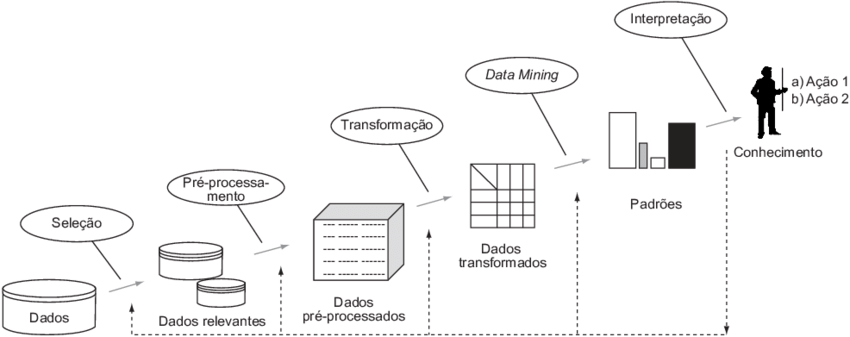

In [1]:
from IPython.display import Image
Image("kdd-fayyad.png")

### Análise Descritiva: o que já aconteceu
### Análise Preditiva: o que pode acontecer
### Análise Prescritiva: o que fazer

# 1. Seleção dos Dados

In [2]:
# Análise e manipulação de conjuntos de dados
import pandas as pd
# Manipulação de arrays
import numpy as np

## 1.1 Microdados Matrículas

In [3]:
df_mat_2021 = pd.read_csv('matriculas_2021.csv', delimiter=';', on_bad_lines='skip')

In [4]:
df_mat_2021.head()

,Carga Horaria,Carga Horaria Mínima,Categoria da Situação,Co Inst,Cod Unidade,Cor / Raça,Código da Matricula,Código da Unidade de Ensino - SISTEC,Código do Ciclo Matricula,Código do Município com DV,...,Vagas Ofertadas,Vagas Regulares AC,Vagas Regulares l1,Vagas Regulares l10,Vagas Regulares l13,Vagas Regulares l14,Vagas Regulares l2,Vagas Regulares l5,Vagas Regulares l6,Vagas Regulares l9
0,200,200.0,Evadidos,262432,557,Amarela,96176470,3479.0,2716099,2407104,...,850.0,850.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,160,160.0,Em curso,26436,6002,Amarela,102483972,45430.0,2830452,4314407,...,2834.0,2834.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,160,160.0,Em curso,26436,6002,Amarela,102459282,45430.0,2830437,4314407,...,1234.0,1234.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,40,160.0,Em curso,26419,116,Amarela,97887414,2936.0,2745532,4302105,...,265.0,265.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1380,1200.0,Em curso,26404,436,Amarela,91646798,2947.0,2632269,2927903,...,40.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df_mat_2021 = df_mat_2021[[ # Identificador único estudante
                            'Código da Matricula', 
                            # Dados socioeconômicos estudante (Fatores externos evasão)
                            'Cor / Raça', 'Renda Familiar', 'Sexo', 'Faixa Etária',
                            # Dados curso (Fatores internos evasão)
                            'Eixo Tecnológico', 'Modalidade de Ensino', 'Turno', 
                            'Tipo de Curso', 'Tipo de Oferta',
                            # Indicador
                            'Fator Esforço Curso', 
                            # Dados localidade IES (Fatores externos evasão)
                            'UF', 'Região', 
                            # Situação de matrícula (Coluna Alvo)
                            'Categoria da Situação']]

In [8]:
df_mat_2021.tail()

,Código da Matricula,Cor / Raça,Renda Familiar,Sexo,Faixa Etária,Eixo Tecnológico,Modalidade de Ensino,Turno,Tipo de Curso,Tipo de Oferta,Fator Esforço Curso,UF,Região,Categoria da Situação
1523341,96122031,Não declarada,Não declarada,S/I,S/I,Desenvolvimento Educacional e Social,Educação a Distância,Não se aplica,Qualificação Profissional (FIC),Não se aplica,"1,1",RS,Região Sul,Concluintes
1523342,96122037,Não declarada,Não declarada,S/I,S/I,Desenvolvimento Educacional e Social,Educação a Distância,Não se aplica,Qualificação Profissional (FIC),Não se aplica,"1,1",RS,Região Sul,Concluintes
1523343,95091099,Parda,"0,5<RFP<=1,0",S/I,S/I,Informação e Comunicação,Educação a Distância,Não se aplica,Qualificação Profissional (FIC),Não se aplica,"1,1",RS,Região Sul,Evadidos
1523344,95087323,Parda,"0,5<RFP<=1,0",S/I,S/I,Informação e Comunicação,Educação a Distância,Não se aplica,Qualificação Profissional (FIC),Não se aplica,"1,1",RS,Região Sul,Evadidos
1523345,95103817,Preta,"0<RFP<=0,5",S/I,S/I,Gestão e Negócios,Educação a Distância,Não se aplica,Qualificação Profissional (FIC),Não se aplica,"1,1",RS,Região Sul,Evadidos


## 1.2 Microdados Eficiência Acadêmica

In [5]:
df_efa_2021 = pd.read_csv('eficiencia_academica_2021.csv', delimiter=';', on_bad_lines='skip')

In [9]:
df_efa_2021 = df_efa_2021[[# Identificador único estudante
                            'Código da Matricula', 
                            # Dados socioeconômicos estudante (Fatores externos evasão)
                            'Cor / Raça', 'Renda Familiar', 'Sexo', 'Faixa Etária',
                            # Dados curso (Fatores internos evasão)
                            'Eixo Tecnológico', 'Modalidade de Ensino', 'Turno', 
                            'Tipo de Curso', 'Tipo de Oferta',
                            # Indicador
                            'Fator Esforço Curso', 
                            # Dados localidade IES (Fatores externos evasão)
                            'UF', 'Região', 
                            # Situação de matrícula (Coluna Alvo)
                            'Categoria da Situação']]

In [10]:
df_efa_2021.tail()

,Código da Matricula,Cor / Raça,Renda Familiar,Sexo,Faixa Etária,Eixo Tecnológico,Modalidade de Ensino,Turno,Tipo de Curso,Tipo de Oferta,Fator Esforço Curso,UF,Região,Categoria da Situação
889850,71196357,Preta,Não declarada,Masculino,30 a 34 anos,Desenvolvimento Educacional e Social,Educação Presencial,Noturno,Licenciatura,Não se aplica,"1,039",SC,Região Sul,Em curso
889851,89017321,Preta,Não declarada,Masculino,35 a 39 anos,Desenvolvimento Educacional e Social,Educação Presencial,Noturno,Qualificação Profissional (FIC),Não se aplica,"1,1",SC,Região Sul,Em curso
889852,87211639,Não declarada,Não declarada,Masculino,35 a 39 anos,Desenvolvimento Educacional e Social,Educação Presencial,Integral,Mestrado,Não se aplica,1,RS,Região Sul,Concluintes
889853,87211647,Não declarada,Não declarada,Masculino,30 a 34 anos,Desenvolvimento Educacional e Social,Educação Presencial,Integral,Mestrado,Não se aplica,1,RS,Região Sul,Concluintes
889854,87211649,Não declarada,Não declarada,Masculino,Maior de 60 anos,Desenvolvimento Educacional e Social,Educação Presencial,Integral,Mestrado,Não se aplica,1,RS,Região Sul,Em curso


## 1.3 Junção datasets

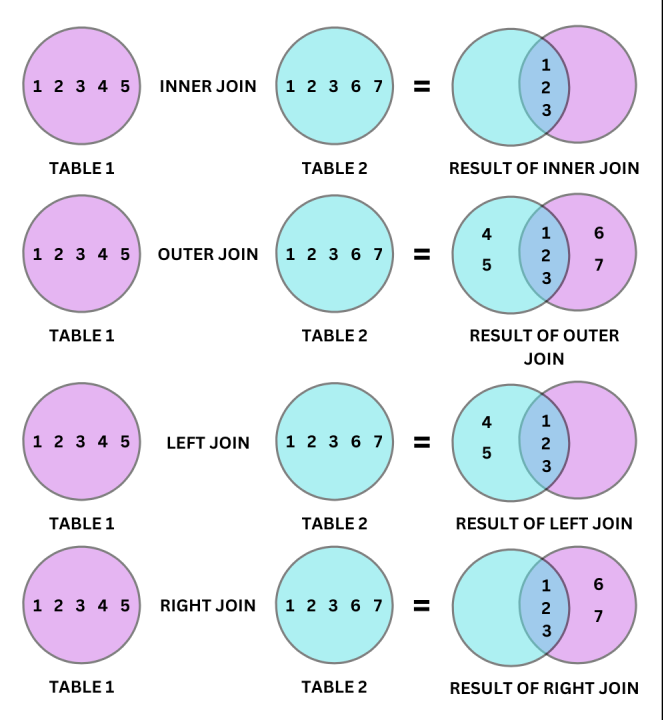

In [9]:
Image("joins.png")

- Outer Join: Soma dos registros de ambas as tabelas (10, 20, 30)
- Left Join: Mesmo número de registros da tabela da esquerda (20, 10, 20)
- Right Join: Mesmo número de registros da tabela da direita (10, 20, 20)
- Inner Join: Somente os registros em comum de ambas as tabelas (menor ou igual do que a maior tabela)

In [11]:
df_2021 = pd.merge(df_mat_2021, df_efa_2021, how='left', on=['Código da Matricula', 'Código da Matricula'])

In [12]:
df_2021.shape

(1523346, 27)

# 2. Preenchimento de dados ausentes

## 2.1 Coluna "Raça"

In [13]:
df_2021['Cor / Raça_x'].value_counts()

Parda            520147
Branca           473927
Não declarada    372543
Preta            134664
Amarela           15866
Indígena           6199
Name: Cor / Raça_x, dtype: int64

In [15]:
# Preencher por correspondência na tabela da direita
df_2021['Cor / Raça_x'] = np.where(
    df_2021['Cor / Raça_x'] == 'Não declarada', # condição
    df_2021['Cor / Raça_y'], # verdadeira
    df_2021['Cor / Raça_x'] # falsa
)

In [16]:
df_2021['Cor / Raça_x'].value_counts()

Parda            520147
Branca           473927
Preta            134664
Não declarada     65922
Amarela           15866
Indígena           6199
Name: Cor / Raça_x, dtype: int64

In [17]:
# Preencher com valor mais frequente (moda)
df_2021['Cor / Raça_x'] = np.where(
    df_2021['Cor / Raça_x'] == 'Não declarada', 
    df_2021['Cor / Raça_x'].mode()[0], 
    df_2021['Cor / Raça_x']
)

In [18]:
df_2021['Cor / Raça_x'].value_counts()

Parda       586069
Branca      473927
Preta       134664
Amarela      15866
Indígena      6199
Name: Cor / Raça_x, dtype: int64

## 2.2 Coluna "Renda"

In [19]:
df_2021['Renda Familiar_x'].value_counts()

Não declarada    642777
0<RFP<=0,5       248110
0,5<RFP<=1,0     209736
1,0<RFP<=1,5     168496
1,5<RFP<=2,5     121290
RFP>3,5           78635
2,5<RFP<=3,5      54302
Name: Renda Familiar_x, dtype: int64

In [20]:
# Preencher por correspondência com a tabela da direita
df_2021['Renda Familiar_x'] = np.where(df_2021['Renda Familiar_x'] == 'Não declarada', df_2021['Renda Familiar_y'], df_2021['Renda Familiar_x'])

In [21]:
# Preencher com valor mais frequente (moda)
df_2021['Renda Familiar_x'] = np.where(df_2021['Renda Familiar_x'] == 'Não declarada', df_2021['Renda Familiar_x'].mode()[0], df_2021['Renda Familiar_x'])

In [22]:
df_2021['Renda Familiar_x'].value_counts()

0<RFP<=0,5      338203
0,5<RFP<=1,0    209736
1,0<RFP<=1,5    168496
1,5<RFP<=2,5    121290
RFP>3,5          78635
2,5<RFP<=3,5     54302
Name: Renda Familiar_x, dtype: int64

## 2.3 Coluna "Sexo"

In [23]:
df_2021['Sexo_x'].value_counts()

Feminino     834650
Masculino    686079
S/I            2617
Name: Sexo_x, dtype: int64

In [24]:
# Preencher por correspondência com a tabela da direita
df_2021['Sexo_x'] = np.where(df_2021['Sexo_x'] == 'S/I', df_2021['Sexo_y'], df_2021['Sexo_x'])

In [25]:
# Preencher com valor mais frequente (moda)
df_2021['Sexo_x'] = np.where(df_2021['Sexo_x'] == 'S/I', df_2021['Sexo_x'].mode()[0], df_2021['Sexo_x'])

In [26]:
df_2021['Sexo_x'].value_counts()

Feminino     837067
Masculino    686079
Name: Sexo_x, dtype: int64

## 2.4 Coluna "Faixa Etária"

In [23]:
df_2021['Faixa Etária_x'].value_counts()

15 a 19 anos        414968
20 a 24 anos        378385
25 a 29 anos        222627
30 a 34 anos        157996
35 a 39 anos        127899
40 a 44 anos         91329
45 a 49 anos         54357
50 a 54 anos         31500
55 a 59 anos         17882
Menor de 14 anos     10912
Maior de 60 anos     10116
S/I                   5375
Name: Faixa Etária_x, dtype: int64

In [24]:
# Preencher por correspondência com a tabela da direita
df_2021['Faixa Etária_x'] = np.where(df_2021['Faixa Etária_x'] == 'S/I', df_2021['Faixa Etária_y'], df_2021['Faixa Etária_x'])

In [25]:
# Preencher com valor mais frequente (moda)
df_2021['Faixa Etária_x'] = np.where(df_2021['Faixa Etária_x'] == 'S/I', df_2021['Faixa Etária_x'].mode()[0], df_2021['Faixa Etária_x'])

In [26]:
df_2021['Faixa Etária_x'].value_counts()

15 a 19 anos        417628
20 a 24 anos        378385
25 a 29 anos        222627
30 a 34 anos        157996
35 a 39 anos        127899
40 a 44 anos         91329
45 a 49 anos         54357
50 a 54 anos         31500
55 a 59 anos         17882
Menor de 14 anos     10912
Maior de 60 anos     10116
Name: Faixa Etária_x, dtype: int64

## 2.5 Coluna "Turno"

In [27]:
df_2021['Turno_x'].value_counts()

Não se aplica    682163
Noturno          291071
Integral         248262
Matutino         154750
Vespertino       146817
Norturno            283
Name: Turno_x, dtype: int64

In [28]:
df_2021['Turno_x'] = np.where(
    df_2021['Turno_x'] == 'Norturno', "Noturno", 
    df_2021['Turno_x']
)

In [29]:
df_2021['Turno_x'].value_counts()

Não se aplica    682163
Noturno          291354
Integral         248262
Matutino         154750
Vespertino       146817
Name: Turno_x, dtype: int64

## 2.6 Colunas "Eixo", "Modalidade", "Tipo de Curso", "Tipo de Oferta", "UF" e "Região"

In [30]:
df_2021['Eixo Tecnológico_x'].value_counts()

Desenvolvimento Educacional e Social    413454
Gestão e Negócios                       240111
Informação e Comunicação                220869
Controle e Processos Industriais        151407
Recursos Naturais                       131682
Ambiente e Saúde                        107726
Infraestrutura                           65299
Produção Alimentícia                     48062
Turismo, Hospitalidade e Lazer           41654
Produção Cultural e Design               36312
Produção Industrial                      35130
Segurança                                17457
Propedêutico                             14183
Name: Eixo Tecnológico_x, dtype: int64

In [31]:
df_2021['Modalidade de Ensino_x'].value_counts()

Educação Presencial     841183
Educação a Distância    682163
Name: Modalidade de Ensino_x, dtype: int64

In [32]:
df_2021['Tipo de Curso_x'].value_counts()

Qualificação Profissional (FIC)    623440
Técnico                            500230
Bacharelado                        128247
Licenciatura                       103546
Tecnologia                          94658
Especialização (Lato Sensu)         49583
Ensino Médio                         6823
Mestrado Profissional                5956
Ensino Fundamental II                4668
Mestrado                             2807
Ensino Fundamental I                 2473
Doutorado                             696
Educação Infantil                     219
Name: Tipo de Curso_x, dtype: int64

In [33]:
df_2021['Tipo de Oferta_x'].value_counts()

Não se aplica            875150
Integrado                284224
Concomitante             186677
Subsequente              159589
PROEJA - Integrado        15585
PROEJA - Concomitante      2121
Name: Tipo de Oferta_x, dtype: int64

In [34]:
df_2021['UF_x'].value_counts()

RS    454475
MG    144146
RJ     75073
SP     71979
RN     69067
SC     65911
CE     57188
MS     51928
BA     50654
GO     48606
PB     48335
PE     43226
ES     41386
MA     38713
RO     34137
PI     33262
PR     29094
MT     27350
PA     24493
AL     21887
DF     21164
TO     20964
AM     19143
SE     11135
AC      7002
AP      6538
RR      6490
Name: UF_x, dtype: int64

In [35]:
df_2021['Região_x'].value_counts()

Região Sul             549267
Região Nordeste        373467
Região Sudeste         332797
Região Centro-Oeste    149048
Região Norte           118767
Name: Região_x, dtype: int64

In [36]:
#df_2021['Fator Esforço Curso_x'].value_counts().hist()

## 2.7 Coluna "Categoria da Situação"

In [37]:
df_2021['Categoria da Situação_x'].value_counts()

Em curso       980492
Evadidos       284796
Concluintes    258058
Name: Categoria da Situação_x, dtype: int64

In [38]:
# Preencher por correspondência com a tabela da direita
df_2021['Categoria da Situação_x'] = np.where(
    df_2021['Categoria da Situação_x'] == "Em curso", 
    df_2021['Categoria da Situação_y'],
    df_2021['Categoria da Situação_x']
)

In [39]:
df_2021['Categoria da Situação_x'].value_counts()

Evadidos       284796
Concluintes    258058
Em curso        59866
Name: Categoria da Situação_x, dtype: int64

## 2.8 Verifica dados nulos

In [40]:
df_2021.isnull().sum()

Código da Matricula              0
Cor / Raça_x                306621
Renda Familiar_x            552684
Sexo_x                         200
Faixa Etária_x                2715
Eixo Tecnológico_x               0
Modalidade de Ensino_x           0
Turno_x                          0
Tipo de Curso_x                  0
Tipo de Oferta_x                 0
Fator Esforço Curso_x            0
UF_x                             0
Região_x                         0
Categoria da Situação_x     920626
Cor / Raça_y               1336383
Renda Familiar_y           1336383
Sexo_y                     1336383
Faixa Etária_y             1336383
Eixo Tecnológico_y         1336383
Modalidade de Ensino_y     1336383
Turno_y                    1336383
Tipo de Curso_y            1336383
Tipo de Oferta_y           1336383
Fator Esforço Curso_y      1336383
UF_y                       1336383
Região_y                   1336383
Categoria da Situação_y    1336383
dtype: int64

In [41]:
df_2021.fillna({'Sexo_x':df_2021['Sexo_x'].mode()[0], 'Faixa Etária_x': df_2021['Sexo_x'].mode()[0]}, inplace=True)

# 3. Transformação dos dados

In [42]:
# Seleciona dados pré-processados
df_2021 = df_2021[
['Código da Matricula',
 'Cor / Raça_x',
 'Renda Familiar_x',
 'Sexo_x',
 'Faixa Etária_x',
 'Eixo Tecnológico_x',
 'Modalidade de Ensino_x',
 'Turno_x',
 'Tipo de Curso_x',
 'Tipo de Oferta_x',
 'Fator Esforço Curso_x',
 'UF_x',
 'Região_x',
 'Categoria da Situação_x']]

In [43]:
# Renomeia colunas
df_2021 = df_2021.rename(columns={"Código da Matricula": "cod_matricula", "Cor / Raça_x": "raca", "Renda Familiar_x": "renda",
                  "Sexo_x": "sexo", "Faixa Etária_x":"faixa_etaria", "Eixo Tecnológico_x": "eixo",
                  "Modalidade de Ensino_x": "modalidade", "Turno_x": "turno", "Tipo de Curso_x": "tipo_curso",
                  "Tipo de Oferta_x": "oferta", "Fator Esforço Curso_x": "fator_esforco", "UF_x": "uf",
                  "Região_x": "regiao", "Categoria da Situação_x": "situacao"})

In [44]:
# Verifica duplicatas
df_2021[df_2021.duplicated()]

,cod_matricula,raca,renda,sexo,faixa_etaria,eixo,modalidade,turno,tipo_curso,oferta,fator_esforco,uf,regiao,situacao


In [45]:
# Remove coluna de identificação de registros
df_2021.drop('cod_matricula', 1, inplace=True)

C:\Users\danie\AppData\Local\Temp/ipykernel_15608/3290182875.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_2021.drop('cod_matricula', 1, inplace=True)


In [46]:
# Exibe tabela final pré-processada
df_2021.tail()

,raca,renda,sexo,faixa_etaria,eixo,modalidade,turno,tipo_curso,oferta,fator_esforco,uf,regiao,situacao
1523341,Parda,"0<RFP<=0,5",Feminino,15 a 19 anos,Desenvolvimento Educacional e Social,Educação a Distância,Não se aplica,Qualificação Profissional (FIC),Não se aplica,"1,1",RS,Região Sul,Concluintes
1523342,Parda,"0<RFP<=0,5",Feminino,15 a 19 anos,Desenvolvimento Educacional e Social,Educação a Distância,Não se aplica,Qualificação Profissional (FIC),Não se aplica,"1,1",RS,Região Sul,Concluintes
1523343,Parda,"0,5<RFP<=1,0",Feminino,15 a 19 anos,Informação e Comunicação,Educação a Distância,Não se aplica,Qualificação Profissional (FIC),Não se aplica,"1,1",RS,Região Sul,Evadidos
1523344,Parda,"0,5<RFP<=1,0",Feminino,15 a 19 anos,Informação e Comunicação,Educação a Distância,Não se aplica,Qualificação Profissional (FIC),Não se aplica,"1,1",RS,Região Sul,Evadidos
1523345,Preta,"0<RFP<=0,5",Feminino,15 a 19 anos,Gestão e Negócios,Educação a Distância,Não se aplica,Qualificação Profissional (FIC),Não se aplica,"1,1",RS,Região Sul,Evadidos


In [47]:
#dummies = pd.get_dummies(df_2021)
#dummies.shape